<a href="https://colab.research.google.com/github/Tanmoy04/Real_estate_lead_generation_model/blob/main/Statistical_Modeling_of_Lead_Behavior_and_Property_Preference_Prediction_in_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_set_fb_leads.csv")

In [3]:
df.columns = ['Email', 'Name', 'Phone', 'Time', 'City', 'Property_Type']

In [4]:
print(df.head())

                        Email                   Name        Phone  \
0  vijaymanickam.vm@gmail.com  Vijay Balaji Manickam  9.19791E+11   
1        selvak.orc@gmail.com             selvak.orc  9.18015E+11   
2       jv_jayvee@hotmail.com  Jayaraman Viswanathan  9.19566E+11   
3      dharini.cool@gmail.com      Dharini Natarajan   9.1994E+11   
4    chiragavaghela@gmail.com         Chirag Vaghela  9.19724E+11   

                       Time         City Property_Type  
0  2024-01-03T08:08:18.257Z  Periyakulam       1.5_bhk  
1  2024-01-03T14:21:24.683Z     Tambaram       1.5_bhk  
2  2024-01-04T03:10:59.871Z      Chennai         1_bhk  
3  2024-01-04T06:34:16.046Z      Chennai       1.5_bhk  
4  2024-01-04T08:36:02.443Z        Surat       1.5_bhk  


In [5]:
df.isnull().sum()

,0
Email,0
Name,0
Phone,0
Time,0
City,0
Property_Type,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.dropna(subset=['Time'], inplace=True)

In [8]:
df['Hour'] = df['Time'].dt.hour
df['DayOfWeek'] = df['Time'].dt.dayofweek
df['Month'] = df['Time'].dt.month

In [9]:
df['City'] = df['City'].str.strip().str.lower()

In [10]:
df.head()

,Email,Name,Phone,Time,City,Property_Type,Hour,DayOfWeek,Month
0,vijaymanickam.vm@gmail.com,Vijay Balaji Manickam,9.19791E+11,2024-01-03 08:08:18.257000+00:00,periyakulam,1.5_bhk,8,2,1
1,selvak.orc@gmail.com,selvak.orc,9.18015E+11,2024-01-03 14:21:24.683000+00:00,tambaram,1.5_bhk,14,2,1
2,jv_jayvee@hotmail.com,Jayaraman Viswanathan,9.19566E+11,2024-01-04 03:10:59.871000+00:00,chennai,1_bhk,3,3,1
3,dharini.cool@gmail.com,Dharini Natarajan,9.1994E+11,2024-01-04 06:34:16.046000+00:00,chennai,1.5_bhk,6,3,1
4,chiragavaghela@gmail.com,Chirag Vaghela,9.19724E+11,2024-01-04 08:36:02.443000+00:00,surat,1.5_bhk,8,3,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Email          744 non-null    object             
 1   Name           744 non-null    object             
 2   Phone          744 non-null    object             
 3   Time           744 non-null    datetime64[ns, UTC]
 4   City           744 non-null    object             
 5   Property_Type  744 non-null    object             
 6   Hour           744 non-null    int32              
 7   DayOfWeek      744 non-null    int32              
 8   Month          744 non-null    int32              
dtypes: datetime64[ns, UTC](1), int32(3), object(5)
memory usage: 43.7+ KB


# **Step 2: EDA — Understanding the Dataset**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Set style for all plots
sns.set(style='whitegrid')

# Set figure size globally
plt.rcParams['figure.figsize'] = (10, 6)

In [14]:
print("Property Type Distribution:")
property_counts = df['Property_Type'].value_counts()
display(property_counts)

Property Type Distribution:


,count
Property_Type,
1.5_bhk,586
1_bhk,158


<ipython-input-15-1b4d7fe94417>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Property_Type', order=property_counts.index, palette='viridis')


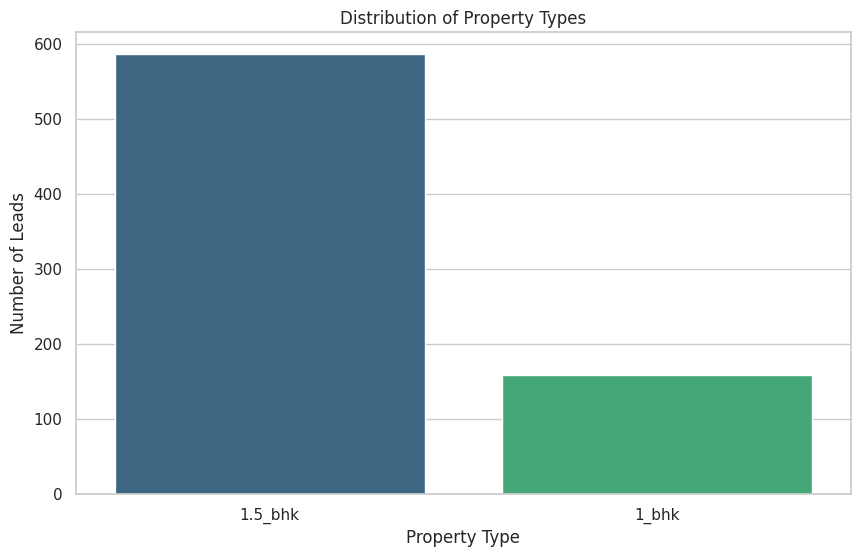

In [15]:
sns.countplot(data=df, x='Property_Type', order=property_counts.index, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Leads')
plt.show()

Leads by City (Top 10):


,count
City,
chennai,365
bangalore,52
coimbatore,25
hyderabad,20
vellore,16
madurai,10
salem,8
bengaluru,8
pondicherry,7


<ipython-input-16-ddd9ceec7052>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['City'].isin(top_cities.index)],


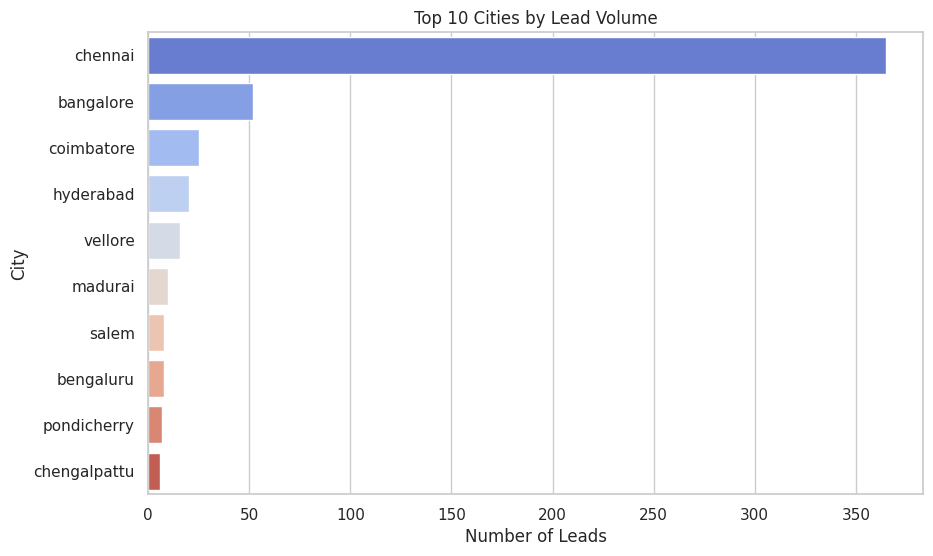

In [16]:
# Leads by City (Top 10 cities)
print("Leads by City (Top 10):")
top_cities = df['City'].value_counts().head(10)
display(top_cities)

sns.countplot(data=df[df['City'].isin(top_cities.index)],
              y='City',
              order=top_cities.index,
              palette='coolwarm')
plt.title('Top 10 Cities by Lead Volume')
plt.xlabel('Number of Leads')
plt.ylabel('City')
plt.show()

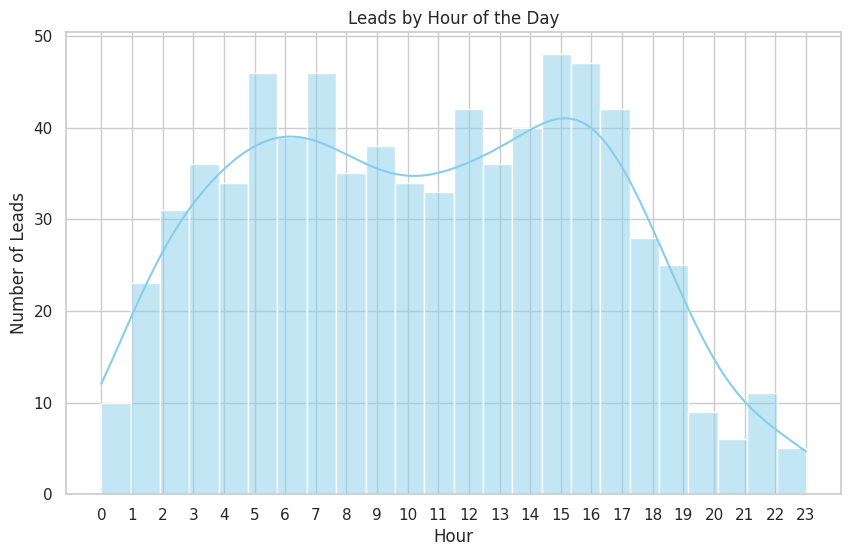

In [17]:
# 3️⃣ Leads by Hour of the Day
sns.histplot(data=df, x='Hour', bins=24, kde=True, color='skyblue')
plt.title('Leads by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Leads')
plt.xticks(range(0, 24))
plt.show()

<ipython-input-18-b6041928b95c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DayName', order=weekday_map, palette='Set2')


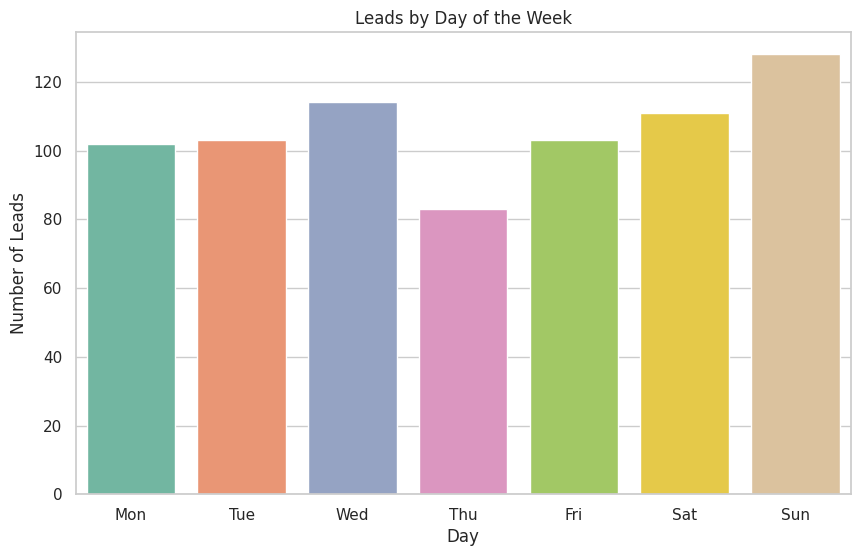

In [18]:
#Leads by Day of the Week
weekday_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['DayName'] = df['DayOfWeek'].map(lambda x: weekday_map[x])

sns.countplot(data=df, x='DayName', order=weekday_map, palette='Set2')
plt.title('Leads by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Leads')
plt.show()

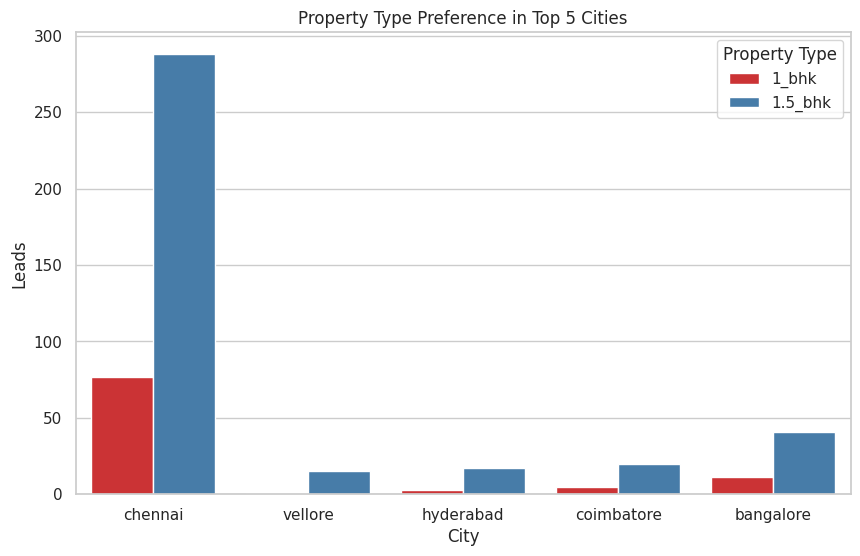

In [19]:
#Property Preference by City (Top 5 cities)
top5_cities = df['City'].value_counts().head(5).index
subset = df[df['City'].isin(top5_cities)]

sns.countplot(data=subset, x='City', hue='Property_Type', palette='Set1')
plt.title('Property Type Preference in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Leads')
plt.legend(title='Property Type')
plt.show()

# **Step 3: Hypothesis Testing (Chi-Square Test)**

In [20]:
#Hypothesis Testing — Chi-Square Test between City and Property Type

from scipy.stats import chi2_contingency

#Select top 5 cities to keep the contingency table manageable
top5_cities = df['City'].value_counts().head(5).index
df_top5 = df[df['City'].isin(top5_cities)]

In [21]:
#Create the contingency table
contingency_table = pd.crosstab(df_top5['City'], df_top5['Property_Type'])
print("Contingency Table (City vs Property Type):")
display(contingency_table)

Contingency Table (City vs Property Type):


Property_Type,1.5_bhk,1_bhk
City,,
bangalore,41,11
chennai,288,77
coimbatore,20,5
hyderabad,17,3
vellore,15,1


In [22]:
#Apply the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [23]:
#Print the results
print("\n Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")



 Chi-Square Test Results:
Chi2 Statistic: 2.4678
Degrees of Freedom: 4
P-value: 0.6504


In [25]:
#Interpretation
alpha = 0.05
if p < alpha:
    print("Result: There is a significant relationship between City and Property Type.")
else:
    print("Result: There is no significant relationship between City and Property Type.")

Result: There is no significant relationship between City and Property Type.


# **Step 4: Machine Learning Model — Decision Tree Classifier**

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
#Encode categorical variables: City and Property_Type
le_city = LabelEncoder()
le_property = LabelEncoder()

df['City_encoded'] = le_city.fit_transform(df['City'])
df['Property_encoded'] = le_property.fit_transform(df['Property_Type'])

In [28]:
#Define features (X) and target (y)
X = df[['Hour', 'DayOfWeek', 'Month', 'City_encoded']]
y = df['Property_encoded']

In [29]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
#Initialize and train the model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [31]:
#Predictions
y_pred = clf.predict(X_test)

📈 Classification Report:
              precision    recall  f1-score   support

     1.5_bhk       0.82      0.96      0.88       183
       1_bhk       0.22      0.05      0.08        41

    accuracy                           0.79       224
   macro avg       0.52      0.51      0.48       224
weighted avg       0.71      0.79      0.74       224


Confusion Matrix:


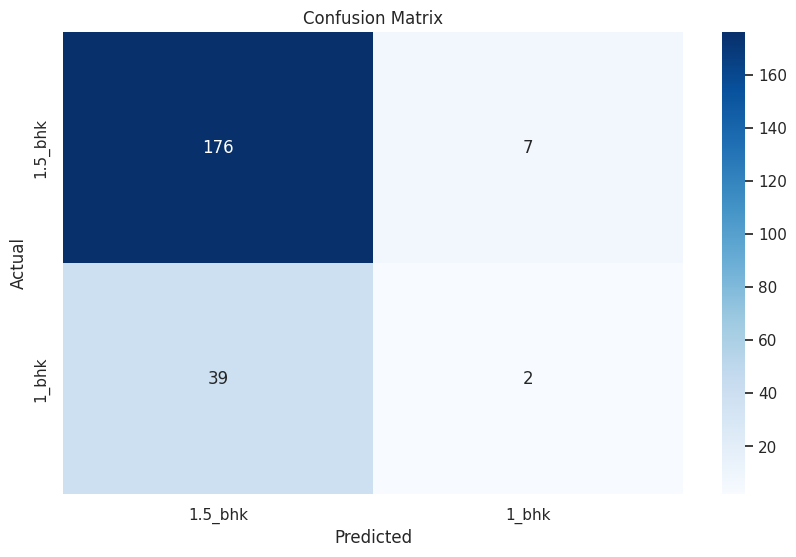

Accuracy Score: 0.79


In [34]:
#Evaluation
print("📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_property.classes_))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_property.classes_, yticklabels=le_property.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

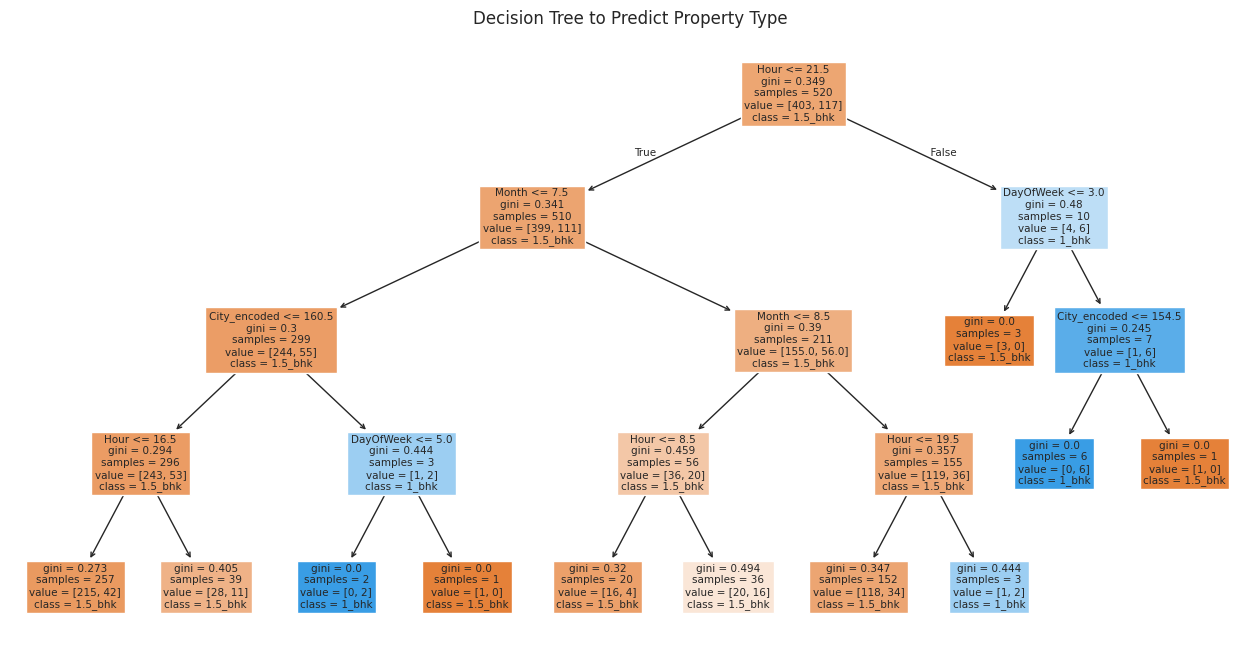

In [35]:
#Visualize the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=le_property.classes_, filled=True)
plt.title("Decision Tree to Predict Property Type")
plt.show()

# **Train a Random Forest Classifier**

Accuracy: 0.7232142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       183
           1       0.08      0.05      0.06        41

    accuracy                           0.72       224
   macro avg       0.44      0.46      0.45       224
weighted avg       0.67      0.72      0.70       224



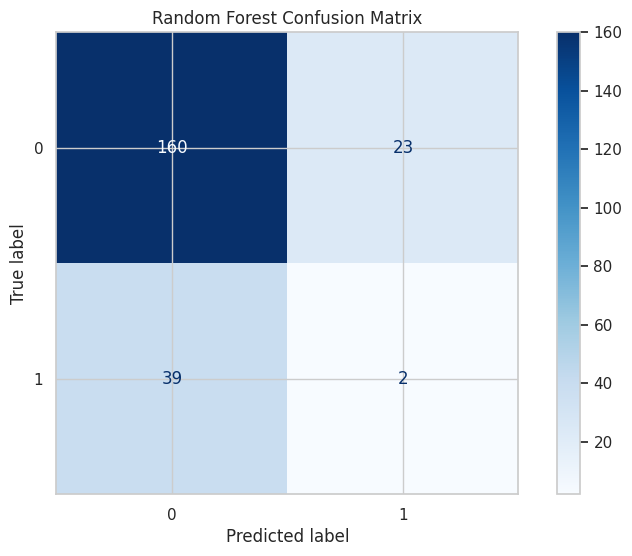

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

#Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Predict on test set
rf_preds = rf_model.predict(X_test)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

#Confusion Matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

# **Step-by-Step Code to Apply SMOTE and Retrain**

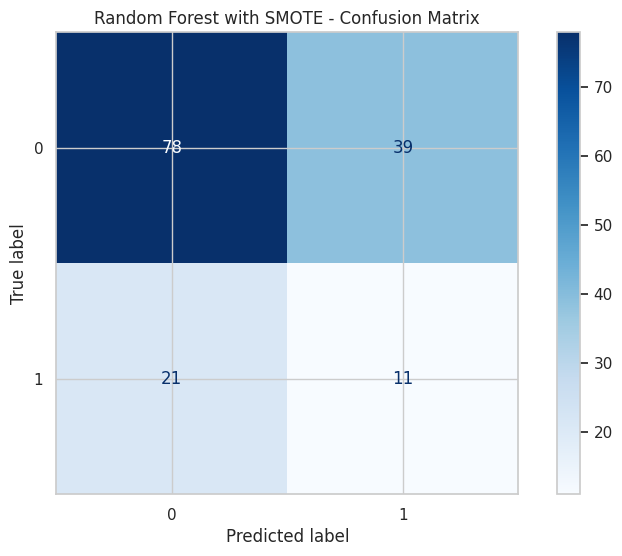

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Step 3: Train Random Forest on resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Step 4: Predict and Evaluate
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Random Forest with SMOTE - Confusion Matrix")
plt.show()
